In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import _pca

In [11]:
X=pd.read_csv('CC GENERAL.csv')
X=X.drop('CUST_ID',axis=1)
X.fillna(method='ffill',inplace=True)

In [12]:
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
X.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [14]:
scaler=StandardScaler()

X_s=scaler.fit_transform(X)
X_norm=pd.DataFrame(normalize(X_s))

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_principal=pca.fit_transform(X_norm)
X_principal=pd.DataFrame(X_principal)
X_principal.columns=['P1','P2']


In [20]:
db_model=DBSCAN(eps=0.05,min_samples=10).fit(X_principal)

In [21]:
labels=db_model.labels_
np.unique(labels)

array([-1,  0,  1], dtype=int64)

In [22]:
np.histogram(labels, bins=len(np.unique(labels)))

(array([  39, 8903,    8], dtype=int64),
 array([-1.        , -0.33333333,  0.33333333,  1.        ]))

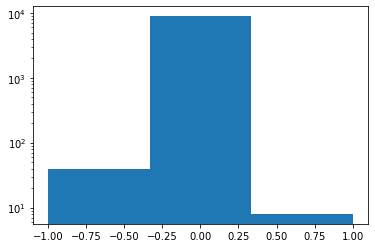

In [23]:
plt.hist(labels, bins=len(np.unique(labels)), log=True)
plt.show()

In [24]:
n_clusters = len(np.unique(labels))-1
anomaly = list(labels).count(-1)
print(f'Clusters: {n_clusters}')
print(f'Abnormal points: {anomaly}')

Clusters: 2
Abnormal points: 39


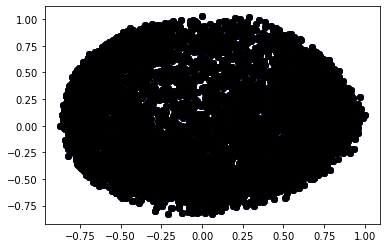

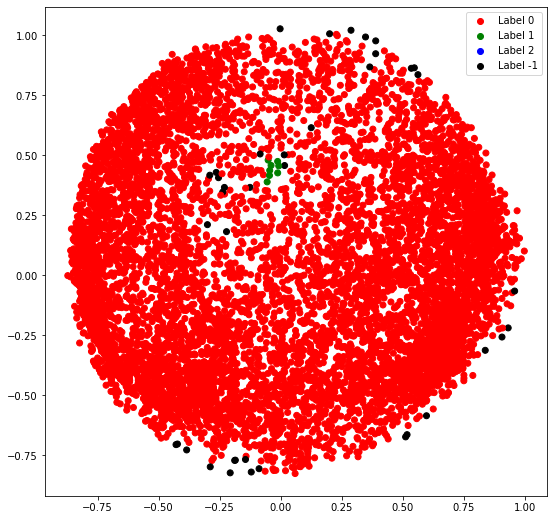

In [25]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]

r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');

plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)

plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()